In [1]:
import os
os.chdir('D:\\3rd sem LSTM\\')

In [12]:
import pandas as pd
df=pd.read_csv('ferry.csv')

In [13]:
df.head()

,Month,Charges
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [14]:
df.tail()

,Month,Charges
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [15]:
df.columns=['Months','Sales']

In [16]:
df.head()

,Months,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [17]:
df['Months']=pd.to_datetime(df['Months'])

In [18]:
df.head()

,Months,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [19]:
df.shape

(105, 2)

In [21]:
df.set_index('Months',inplace=True)

In [23]:
df

,Sales
Months,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

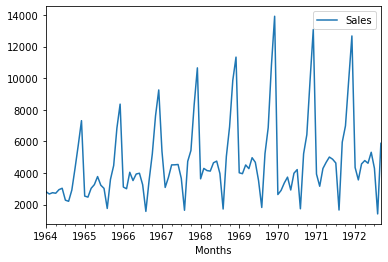

In [25]:
df.plot()

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
test_result=adfuller(df['Sales'])

In [28]:

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [29]:

adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [30]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [31]:
df

,Sales,Sales First Difference
Months,,
1964-01-01,2815,NaN
1964-02-01,2672,-143.0
1964-03-01,2755,83.0
1964-04-01,2721,-34.0
1964-05-01,2946,225.0
...,...,...
1972-05-01,4618,-170.0
1972-06-01,5312,694.0
1972-07-01,4298,-1014.0


In [33]:
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -7.1898964480510195
p-value : 2.519620447386778e-10
#Lags Used : 11
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [34]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [35]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Months,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN


In [36]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


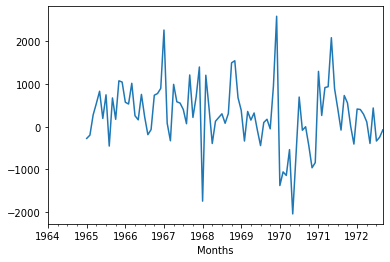

In [37]:
df['Seasonal First Difference'].plot()

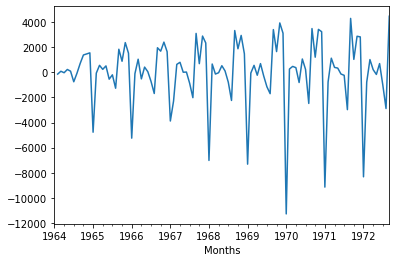

In [38]:
df['Sales First Difference'].plot()

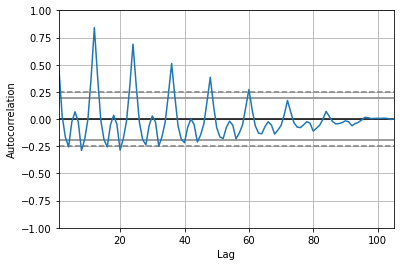

In [42]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

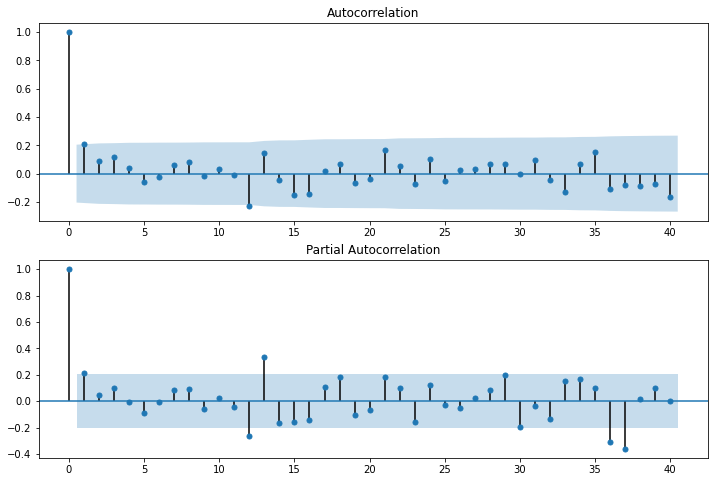

In [46]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [47]:

# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [48]:

model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\TANMAY\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\TANMAY\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [49]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 12 Sep 2020   AIC                           1910.251
Time:                        23:21:14   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7847     12.405      1.837      0.066      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [51]:
df.shape

(105, 3)

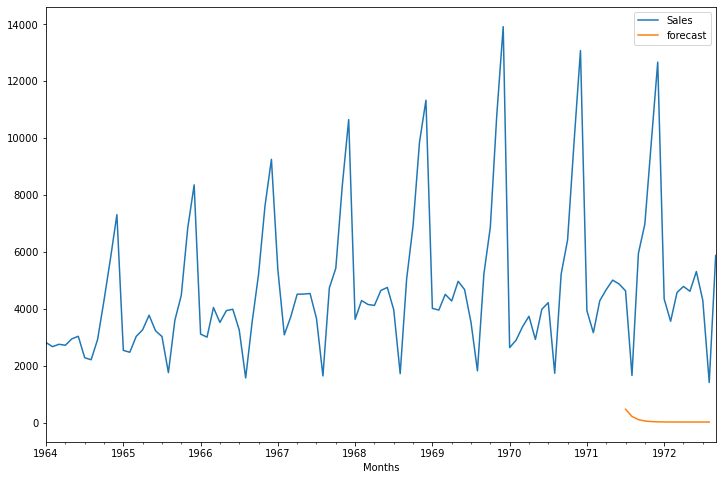

In [52]:

df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [53]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\TANMAY\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\TANMAY\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


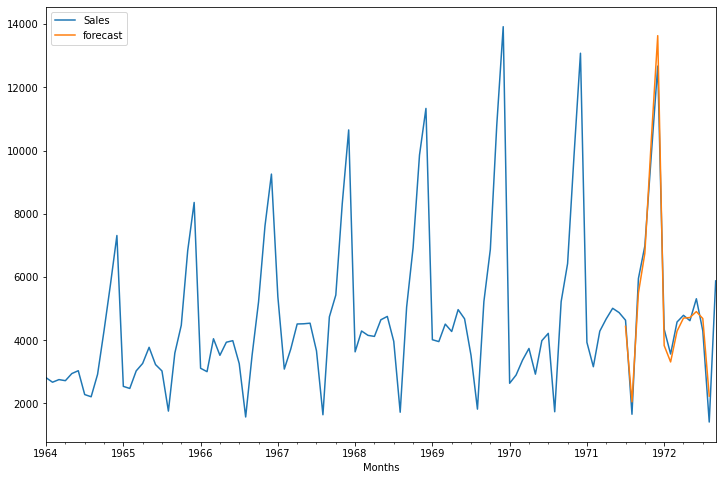

In [54]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))


In [55]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [56]:
df

,Sales,Sales First Difference,Seasonal First Difference,forecast
Months,,,,
1964-01-01,2815,NaN,NaN,NaN
1964-02-01,2672,-143.0,NaN,NaN
1964-03-01,2755,83.0,NaN,NaN
1964-04-01,2721,-34.0,NaN,NaN
1964-05-01,2946,225.0,NaN,NaN
...,...,...,...,...
1972-05-01,4618,-170.0,-392.0,4717.510747
1972-06-01,5312,694.0,438.0,4906.403921
1972-07-01,4298,-1014.0,-335.0,4685.436339


In [57]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [58]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [59]:
future_df=pd.concat([df,future_datest_df])

In [60]:
future_df

,Sales,Sales First Difference,Seasonal First Difference,forecast
1964-01-01,2815,NaN,NaN,NaN
1964-02-01,2672,-143.0,NaN,NaN
1964-03-01,2755,83.0,NaN,NaN
1964-04-01,2721,-34.0,NaN,NaN
1964-05-01,2946,225.0,NaN,NaN
...,...,...,...,...
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN


In [63]:
df.shape

(105, 4)

In [61]:
future_df.shape

(128, 4)

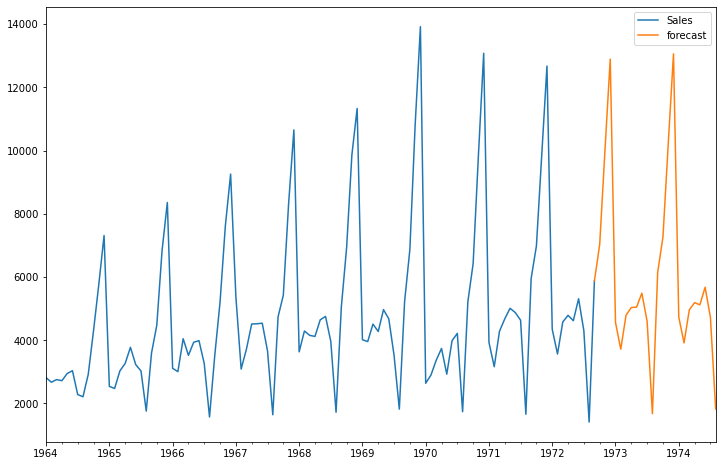

In [67]:
future_df['forecast'] = results.predict(start = 104, end = 128, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [68]:
future_df.tail(15)

,Sales,Sales First Difference,Seasonal First Difference,forecast
1973-06-01,NaN,NaN,NaN,5488.573118
1973-07-01,NaN,NaN,NaN,4593.627915
1973-08-01,NaN,NaN,NaN,1676.138594
1973-09-01,NaN,NaN,NaN,6146.224049
1973-10-01,NaN,NaN,NaN,7262.512331
1973-11-01,NaN,NaN,NaN,10194.735757
1973-12-01,NaN,NaN,NaN,13057.412466
1974-01-01,NaN,NaN,NaN,4731.200832
1974-02-01,NaN,NaN,NaN,3915.317594
1974-03-01,NaN,NaN,NaN,4961.391170
